# U-Net 
19/02/2025

# **Uso de U-Net en la Detección de Remolinos Oceánicos**

La U-Net es una arquitectura de red neuronal convolucional (CNN) diseñada originalmente para la segmentación de imágenes biomédicas, pero ha sido adaptada con éxito para la detección de remolinos oceánicos en diversos estudios recientes.

## **Aplicaciones de U-Net en la Detección de Remolinos**
La U-Net se ha utilizado en diferentes configuraciones y variantes para mejorar la segmentación de remolinos oceánicos en imágenes satelitales:

- **ADUNet (Attention Dual U-Net)**: Una versión de U-Net que incorpora un mecanismo de atención para mejorar la detección de remolinos en imágenes satelitales de anomalía de nivel del mar (SLA) y temperatura superficial del mar (SSTA). Esta arquitectura permite una mejora en la precisión y eficiencia del modelo [[1]].
  
- **3D-U-Res-Net**: Una variación en 3D de U-Net que incorpora conexiones residuales para la detección de estructuras tridimensionales de remolinos oceánicos. Permite una mejor fusión de información espacial y mejora la identificación de estructuras profundas en el océano [[2]].

- **EddyNet**: Un modelo basado en U-Net específicamente diseñado para la segmentación de remolinos oceánicos a partir de mapas altimétricos. Ha demostrado ser eficiente en la clasificación y segmentación de estos fenómenos en datos de observación satelital [[3]].

## **Ventajas del Uso de U-Net en la Detección de Remolinos**
- **Preservación de detalles espaciales**: Gracias a sus conexiones de "skip", la arquitectura U-Net permite retener información de alta resolución durante la segmentación.
- **Capacidad de trabajar con datos multicanal**: Se puede alimentar con múltiples variables oceanográficas como SLA, temperatura del mar y velocidades geostróficas.
- **Eficiencia computacional**: Su diseño optimizado permite un entrenamiento relativamente eficiente en comparación con arquitecturas más profundas.

## **Conclusión**
La U-Net y sus variantes han demostrado ser herramientas poderosas para la detección de remolinos oceánicos. Las mejoras recientes, como la integración de módulos de atención y el uso de datos tridimensionales, han permitido una identificación más precisa y completa de estos fenómenos oceánicos.

---

## **Referencias**
1. Xie, H., Xu, Q., & Dong, C. (2024). *Deep Learning for Mesoscale Eddy Detection With Feature Fusion of Multisatellite Observations*. IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing. [[PDF]](Deep_Learning_for_Mesoscale_Eddy_Detection_With_Feature_Fusion_of_Multisatellite_Observations.pdf)

2. Xu, G., Xie, W., Lin, X., Liu, Y., Hang, R., Sun, W., Liu, D., & Dong, C. (2024). *Detection of Three-Dimensional Structures of Oceanic Eddies Using Artificial Intelligence*. Ocean Modelling, 190, 102385. [[PDF]](1-s2.0-S1463500324000726-main.pdf)

3. Duo, Z., Wang, W., & Wang, H. (2019). *Oceanic Mesoscale Eddy Detection Method Based on Deep Learning*. Remote Sensing, 11(16), 1921. [[PDF]](remotesensing-11-01921.pdf)


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy

# -----------------------------
# Función para construir la U-Net
# -----------------------------
def build_unet(input_shape=(32, 32, 1)):
    inputs = Input(input_shape)
    
    # Encoder
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    
    # Decoder
    up4 = UpSampling2D(size=(2, 2))(conv3)
    up4 = concatenate([up4, conv2], axis=-1)
    conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(up4)
    conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv4)
    
    up5 = UpSampling2D(size=(2, 2))(conv4)
    up5 = concatenate([up5, conv1], axis=-1)
    conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(up5)
    conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv5)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(conv5)
    
    model = Model(inputs, outputs)
    return model

# -----------------------------
# Compilar el modelo
# -----------------------------
model = build_unet()
model.compile(optimizer=Adam(learning_rate=0.001), loss=BinaryCrossentropy(), metrics=[Accuracy()])

# Mostrar estructura del modelo
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 32, 32, 1)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 32, 32, 32)        │             320 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 32, 32, 32)        │           9,248 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 16, 16, 32)        │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 16, 16, 64)        │          18,496 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 16, 16, 64)        │          36,928 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 8, 8, 64)          │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 8, 8, 128)         │          73,856 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 8, 8, 128)         │         147,584 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ up_sampling2d (UpSampling2D)  │ (None, 16, 16, 128)       │               0 │ conv2d_5[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 16, 16, 192)       │               0 │ up_sampling2d[0][0],       │
│                               │                           │                 │ conv2d_3[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 16, 16, 64)        │         110,656 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 16, 16, 64)        │          36,928 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ up_sampling2d_1               │ (None, 32, 32, 64)        │               0 │ conv2d_7[0][0]             │
│ (UpSampling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_1 (Concatenate)   │ (None, 32, 32, 96)        │               0 │ up_sampling2d_1[0][0],     │
│                               │                           │                 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 470,977 (1.80 MB)

 Trainable params: 470,977 (1.80 MB)

 Non-trainable params: 0 (0.00 B)

## Generar datos de entrada

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from skimage import measure
from matplotlib.path import Path
from scipy.spatial import ConvexHull

# -------------------------------
# Cargar datos
# -------------------------------
archivo = r"anomalia_SLA_GC_NeurOST.nc"
ds = xr.open_dataset(archivo)
lat_vec = ds["lat"].values
lon_vec = ds["lon"].values
sla = ds["sla_anomaly"].values


# -------------------------------
# Función de detección CHE11
# -------------------------------
def detectar_che11(sla, lat_vec, lon_vec):
    """ Método CHE11: Contornos cerrados de SLA con filtrado por tamaño """
    plt.figure(figsize=(8, 6))
    contorno_figura = plt.contour(lon_vec, lat_vec, sla, levels=20, cmap="RdBu_r")
    niveles_sla = contorno_figura.levels
    plt.close()
    
    contornos_detectados = []
    for nivel in niveles_sla:
        contornos = measure.find_contours(sla, level=nivel)
        for contorno in contornos:
            if np.allclose(contorno[0], contorno[-1], atol=2):
                contornos_detectados.append(contorno)
    
    # Filtrar contornos internos
    contornos_filtrados = []
    for i, contorno_externo in enumerate(contornos_detectados):
        path_externo = Path(contorno_externo)
        es_interno = False
        for j, contorno_otro in enumerate(contornos_detectados):
            if i != j:
                path_otro = Path(contorno_otro)
                if path_otro.contains_path(path_externo):
                    es_interno = True
                    break
        if not es_interno:
            contornos_filtrados.append(contorno_externo)
    
    # Filtrar por diámetro
    def calcular_diametro(contorno, lat_vec, lon_vec):
        if len(contorno) < 3:
            return 0
        hull = ConvexHull(contorno)
        latitudes = lat_vec[contorno[:, 0].astype(int)]
        longitudes = lon_vec[contorno[:, 1].astype(int)]
        distancias = [np.linalg.norm(np.array([longitudes[i], latitudes[i]]) - np.array([longitudes[j], latitudes[j]]))
                      for i in range(len(latitudes)) for j in range(i+1, len(latitudes))]
        return max(distancias) * 111  # Convertir grados a kilómetros
    
    umbral_diametro_min_km = 10
    umbral_diametro_max_km = 500
    contornos_finales = [c for c in contornos_filtrados if umbral_diametro_min_km <= calcular_diametro(c, lat_vec, lon_vec) <= umbral_diametro_max_km]
    
    return contornos_finales

# -------------------------------
# Función de detección HAL13
# -------------------------------
def detectar_hal13(contornos_che11, sla, lat_vec, lon_vec):
    """ Método HAL13: Aplica Okubo-Weiss a los contornos de CHE11 """
    def calcular_okubo_weiss(sla, lat, lon, g=9.81):
        Omega = 7.2921e-5
        lat_mean = np.mean(lat)
        f = 2 * Omega * np.sin(np.deg2rad(lat_mean))
        dx = np.gradient(lon) * 111320  # Aproximación en metros
        dy = np.gradient(lat)[:, np.newaxis] * 111320
        dSLA_dx = np.gradient(sla, axis=1) / dx
        dSLA_dy = np.gradient(sla, axis=0) / dy
        ugos = - (g / f) * dSLA_dy
        vgos = (g / f) * dSLA_dx
        du_dx = np.gradient(ugos, axis=1) / dx
        du_dy = np.gradient(ugos, axis=0) / dy
        dv_dx = np.gradient(vgos, axis=1) / dx
        dv_dy = np.gradient(vgos, axis=0) / dy
        Sn = du_dx - dv_dy
        Ss = du_dy + dv_dx
        zeta = dv_dx - du_dy
        W = Sn**2 + Ss**2 - zeta**2
        return W
    
    W = calcular_okubo_weiss(sla, lat_vec, lon_vec)
    contornos_finales = []
    umbral_ow = -0  # Umbral para identificar remolinos
    
    for contorno in contornos_che11:
        indices_x = contorno[:, 1].astype(int)
        indices_y = contorno[:, 0].astype(int)
        if np.nanmean(W[indices_y, indices_x]) < umbral_ow:
            contornos_finales.append(contorno)
    
    return contornos_finales

# -------------------------------
# Función de detección NEN10
# -------------------------------
def detectar_nen10(sla, lat_vec, lon_vec):
    """ Método NEN10: Identificación de remolinos por geometría de velocidades """
    def calcular_velocidades_geostroficas(sla, lat, lon, g=9.81):
        Omega = 7.2921e-5
        lat_mean = np.mean(lat)
        f = 2 * Omega * np.sin(np.deg2rad(lat_mean))
        dx = np.gradient(lon) * 111320
        dy = np.gradient(lat)[:, np.newaxis] * 111320
        dSLA_dx = np.gradient(sla, axis=1) / dx
        dSLA_dy = np.gradient(sla, axis=0) / dy
        ugos = - (g / f) * dSLA_dy
        vgos = (g / f) * dSLA_dx
        return ugos, vgos
    
    ugos, vgos = calcular_velocidades_geostroficas(sla, lat_vec, lon_vec)
    vorticidad = np.gradient(vgos, axis=1) - np.gradient(ugos, axis=0)
    umbral_vorticidad = np.nanpercentile(np.abs(vorticidad), 90)
    mascara_remolinos = np.abs(vorticidad) > umbral_vorticidad
    contornos_detectados = measure.find_contours(mascara_remolinos.astype(float), level=0.5)
    
    # Filtrar contornos internos
    contornos_finales = []
    for i, contorno_externo in enumerate(contornos_detectados):
        path_externo = Path(contorno_externo)
        es_interno = False
        for j, contorno_otro in enumerate(contornos_detectados):
            if i != j:
                path_otro = Path(contorno_otro)
                if path_otro.contains_path(path_externo):
                    es_interno = True
                    break
        if not es_interno:
            contornos_finales.append(contorno_externo)
    
    return contornos_finales

# -------------------------------
# Aplicar métodos de detección día a día
# -------------------------------
contornos_che11_tiempo = []
contornos_hal13_tiempo = []
contornos_nen10_tiempo = []

for i in range(sla.shape[0]):
    print(f"Procesando día {i}...")
    contornos_che11 = detectar_che11(sla[i], lat_vec, lon_vec)
    contornos_hal13 = detectar_hal13(contornos_che11, sla[i], lat_vec, lon_vec)
    contornos_nen10 = detectar_nen10(sla[i], lat_vec, lon_vec)
    
    contornos_che11_tiempo.append(contornos_che11)
    contornos_hal13_tiempo.append(contornos_hal13)
    contornos_nen10_tiempo.append(contornos_nen10)

Procesando día 0...


C:\Users\Segunda El Dago\AppData\Local\Temp\ipykernel_20104\2748608300.py:98: RuntimeWarning: Mean of empty slice
  if np.nanmean(W[indices_y, indices_x]) < umbral_ow:


Procesando día 1...
Procesando día 2...
Procesando día 3...
Procesando día 4...
Procesando día 5...
Procesando día 6...
Procesando día 7...
Procesando día 8...
Procesando día 9...
Procesando día 10...
Procesando día 11...
Procesando día 12...
Procesando día 13...
Procesando día 14...
Procesando día 15...
Procesando día 16...
Procesando día 17...
Procesando día 18...
Procesando día 19...
Procesando día 20...
Procesando día 21...
Procesando día 22...
Procesando día 23...
Procesando día 24...
Procesando día 25...
Procesando día 26...
Procesando día 27...
Procesando día 28...
Procesando día 29...
Procesando día 30...
Procesando día 31...
Procesando día 32...
Procesando día 33...
Procesando día 34...
Procesando día 35...
Procesando día 36...
Procesando día 37...
Procesando día 38...
Procesando día 39...
Procesando día 40...
Procesando día 41...
Procesando día 42...
Procesando día 43...
Procesando día 44...
Procesando día 45...
Procesando día 46...
Procesando día 47...
Procesando día 48...
P

In [60]:
import numpy as np
import xarray as xr
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras.backend as K
from skimage.draw import polygon
from keras.losses import binary_crossentropy

# -------------------------------
# Cargar Datos Procesados
# -------------------------------
archivo = "anomalia_SLA_GC_NeurOST.nc"
ds = xr.open_dataset(archivo)
lat_vec = ds["lat"].values
lon_vec = ds["lon"].values
sla = ds["sla_anomaly"].values  # (896, 110, 100)

# Crear máscara de NaNs
mascara_nan = np.isnan(sla).astype(np.uint8)
mascara_nan = 1 - mascara_nan


# Reemplazar NaNs con cero para evitar problemas numéricos
sla = np.nan_to_num(sla)

# -------------------------------
# Generar Etiquetas Binarias (Y) Basadas en Métodos de Detección
# -------------------------------
def generar_mascara_binaria(contornos, shape):
    """ Crea una máscara binaria a partir de contornos detectados. """
    mascara = np.zeros(shape, dtype=np.uint8)
    for contorno in contornos:
        if len(contorno) > 2:
            rr, cc = polygon(contorno[:, 0], contorno[:, 1], shape)
            mascara[rr, cc] = 1  # Marcar zona como remolino
    return mascara

mascaras_che11 = [generar_mascara_binaria(c, sla.shape[1:]) for c in contornos_che11_tiempo]
mascaras_hal13 = [generar_mascara_binaria(c, sla.shape[1:]) for c in contornos_hal13_tiempo]
mascaras_nen10 = [generar_mascara_binaria(c, sla.shape[1:]) for c in contornos_nen10_tiempo]

# Mayoría de votos para definir remolino
Y = np.array([(m_che11 + m_hal13 + m_nen10) >= 2 for m_che11, m_hal13, m_nen10 in zip(mascaras_che11, mascaras_hal13, mascaras_nen10)]).astype(int)
Y = np.expand_dims(Y, axis=-1)  # Expandimos dimensión para compatibilidad con la U-Net

# -------------------------------
# Generar Datos de Entrada (X) para U-Net
# -------------------------------
dSLA_dx = np.gradient(sla, axis=2)  # Derivada en longitud
dSLA_dy = np.gradient(sla, axis=1)  # Derivada en latitud

X = np.stack([sla, dSLA_dx, dSLA_dy, mascara_nan], axis=-1)  # (896, 110, 100, 4)

# -------------------------------
# División en Entrenamiento, Validación y Prueba
# -------------------------------
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# -------------------------------
# Definir la función de pérdida enmascarada
# -------------------------------
def masked_binary_crossentropy(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    # Asegurar que ambas tengan la misma forma
    y_true = tf.reshape(y_true, tf.shape(y_pred))
    
    # Crear máscara para ignorar valores NaN (-1)
    mask = tf.where(tf.equal(y_true, -1), 0.0, 1.0)
    mask = tf.reshape(mask, tf.shape(y_true))
    
    # Calcular la pérdida binaria
    loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    loss = tf.reshape(loss, tf.shape(mask))
    
    # Aplicar la máscara correctamente
    masked_loss = tf.reduce_sum(loss * mask) / (tf.reduce_sum(mask) + tf.keras.backend.epsilon())
    
    return masked_loss



# Imprimir tamaños
print("X_train:", X_train.shape, "Y_train:", Y_train.shape)
print("X_val:", X_val.shape, "Y_val:", Y_val.shape)
print("X_test:", X_test.shape, "Y_test:", Y_test.shape)


X_train: (627, 110, 100, 4) Y_train: (627, 110, 100, 1)
X_val: (134, 110, 100, 4) Y_val: (134, 110, 100, 1)
X_test: (135, 110, 100, 4) Y_test: (135, 110, 100, 1)


In [87]:
np.savez("datos_remolinos.npz", 
         X_train=X_train, Y_train=Y_train, 
         X_val=X_val, Y_val=Y_val, 
         X_test=X_test, Y_test=Y_test,
         lon=lon_vec, lat=lat_vec)


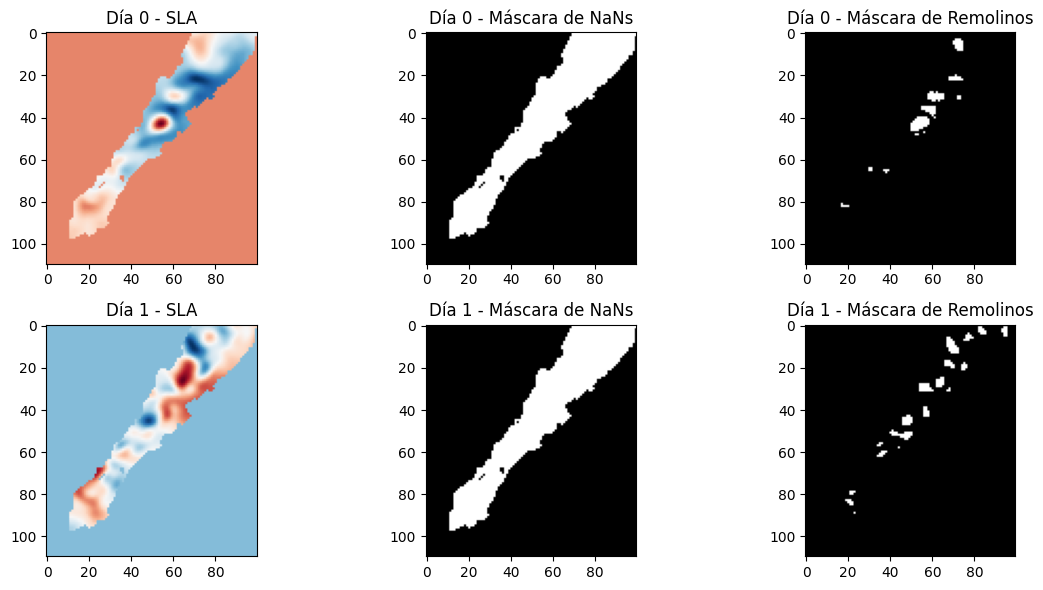

In [27]:
# -------------------------------
# Graficar algunos ejemplos de entrenamiento
# -------------------------------
def graficar_datos_entrenamiento(X_train, Y_train, indices=[0, 1]):
    fig, axes = plt.subplots(len(indices), 3, figsize=(12, 6))
    for i, idx in enumerate(indices):
        sla_sample = X_train[idx, :, :, 0]  # SLA
        mask_nan_sample = X_train[idx, :, :, 3]  # Máscara de NaNs
        remolino_sample = Y_train[idx, :, :, 0]  # Máscara de remolinos

        axes[i, 0].imshow(sla_sample, cmap="RdBu_r")
        axes[i, 0].set_title(f"Día {idx} - SLA")

        axes[i, 1].imshow(mask_nan_sample, cmap="gray")
        axes[i, 1].set_title(f"Día {idx} - Máscara de NaNs")

        axes[i, 2].imshow(remolino_sample, cmap="gray")
        axes[i, 2].set_title(f"Día {idx} - Máscara de Remolinos")

    plt.tight_layout()
    plt.show()

graficar_datos_entrenamiento(X_train, Y_train)

Dimensiones de u4: (None, 55, 50, 64)


Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_31 (InputLayer)   │ (None, 110, 100, 4)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_290 (Conv2D)           │ (None, 110, 100, 32)      │           1,184 │ input_layer_31[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_291 (Conv2D)           │ (None, 110, 100, 32)      │           9,248 │ conv2d_290[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_62              │ (None, 55, 50, 32)        │               0 │ conv2d_291[0][0]           │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_292 (Conv2D)           │ (None, 55, 50, 64)        │          18,496 │ max_pooling2d_62[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_293 (Conv2D)           │ (None, 55, 50, 64)        │          36,928 │ conv2d_292[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_63              │ (None, 27, 25, 64)        │               0 │ conv2d_293[0][0]           │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_294 (Conv2D)           │ (None, 27, 25, 128)       │          73,856 │ max_pooling2d_63[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_295 (Conv2D)           │ (None, 27, 25, 128)       │         147,584 │ conv2d_294[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_transpose_46           │ (None, 54, 50, 64)        │          73,792 │ conv2d_295[0][0]           │
│ (Conv2DTranspose)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_17             │ (None, 55, 50, 64)        │               0 │ conv2d_transpose_46[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_49 (Concatenate)  │ (None, 55, 50, 128)       │               0 │ conv2d_293[0][0],          │
│                               │                           │                 │ zero_padding2d_17[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_296 (Conv2D)           │ (None, 55, 50, 64)        │          73,792 │ concatenate_49[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_297 (Conv2D)           │ (None, 55, 50, 64)        │          36,928 │ conv2d_296[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_transpose_47           │ (None, 110, 100, 32)      │          18,46

 Total params: 518,017 (1.98 MB)

 Trainable params: 518,017 (1.98 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9572 - loss: 0.3639 - val_accuracy: 0.9798 - val_loss: 0.0584
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9798 - loss: 0.0575 - val_accuracy: 0.9798 - val_loss: 0.0554
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9793 - loss: 0.0563 - val_accuracy: 0.9798 - val_loss: 0.0543
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9796 - loss: 0.0549 - val_accuracy: 0.9798 - val_loss: 0.0541
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9799 - loss: 0.0541 - val_accuracy: 0.9798 - val_loss: 0.0540
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9793 - loss: 0.0554 - val_accuracy: 0.9798 - val_loss: 0.0543
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 78s 947ms/step - accuracy: 0.9795 - loss: 0.0552 - val_accuracy: 0.9798 - val_loss: 0.0534
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9801 - loss: 0.0535 - val_accuracy: 0.9798 - val_lo

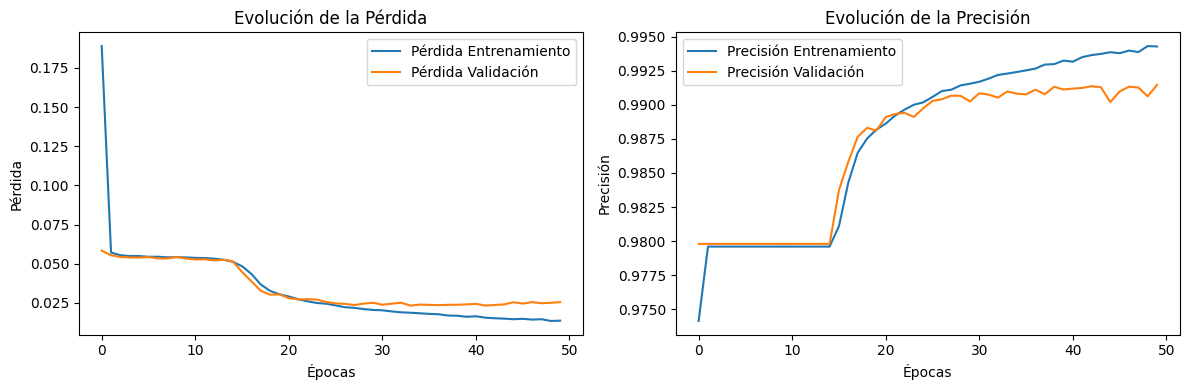

In [61]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


# -------------------------------
# Definir la U-Net
# -------------------------------
def build_unet(input_shape):
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)
    
    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)
    
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c3)
    
    # Decoder (Corrigiendo dimensiones antes de concatenar)
    u4 = layers.Conv2DTranspose(64, (3, 3), strides=2, padding='same', activation='relu')(c3)
    u4 = layers.ZeroPadding2D(((1, 0), (0, 0)))(u4)  # Agregar una fila en la parte superior
    #u4 = layers.Cropping2D(((1, 0), (0, 0)))(u4)  # Ajustar tamaño antes de concatenar
    print("Dimensiones de u4:", u4.shape)
    merge1 = layers.concatenate([c2, u4], axis=-1)
    c4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(merge1)
    c4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c4)
    
    u5 = layers.Conv2DTranspose(32, (3, 3), strides=2, padding='same', activation='relu')(c4)
    merge2 = layers.concatenate([c1, u5], axis=-1)
    c5 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(merge2)
    c5 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c5)
    
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')(c5)
    
    model = models.Model(inputs, outputs)
    return model

# Crear el modelo
input_shape = (110, 100, 4)
unet_model = build_unet(input_shape)

# Mostrar resumen del modelo
unet_model.summary()

# Compilar el modelo
unet_model.compile(optimizer='adam', loss=masked_binary_crossentropy, metrics=['accuracy'])

# -------------------------------
# Entrenar la U-Net con validación
# -------------------------------
history = unet_model.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_val, Y_val),
    verbose=1
)

# Guardar el modelo entrenado
unet_model.save("modelo_unet_remolinos.h5")

# -------------------------------
# Graficar curvas de entrenamiento y validación
# -------------------------------
def plot_training_curves(history):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    
    # Pérdida
    axs[0].plot(history.history['loss'], label='Pérdida Entrenamiento')
    axs[0].plot(history.history['val_loss'], label='Pérdida Validación')
    axs[0].set_title('Evolución de la Pérdida')
    axs[0].set_xlabel('Épocas')
    axs[0].set_ylabel('Pérdida')
    axs[0].legend()
    
    # Precisión
    axs[1].plot(history.history['accuracy'], label='Precisión Entrenamiento')
    axs[1].plot(history.history['val_accuracy'], label='Precisión Validación')
    axs[1].set_title('Evolución de la Precisión')
    axs[1].set_xlabel('Épocas')
    axs[1].set_ylabel('Precisión')
    axs[1].legend()
    
    plt.tight_layout()
    plt.show()

# Mostrar curvas de entrenamiento y validación
plot_training_curves(history)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


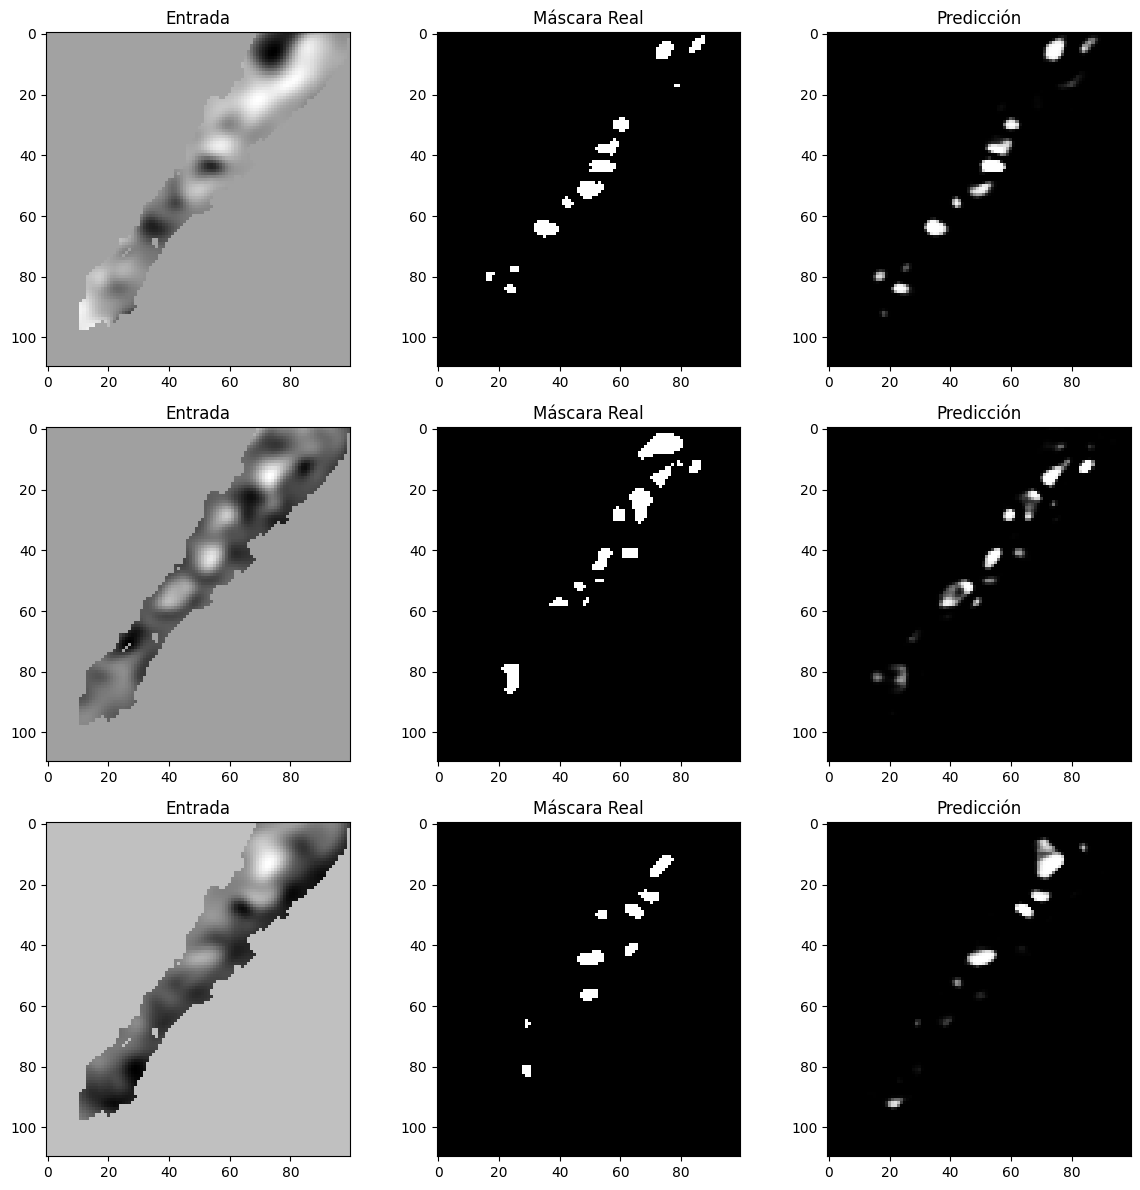

In [62]:
# -------------------------------
# Generar y visualizar predicciones
# -------------------------------
def visualize_predictions(model, X_test, Y_test, num_samples=3):
    indices = np.random.choice(len(X_test), num_samples, replace=False)
    predictions = model.predict(X_test[indices])
    
    fig, axes = plt.subplots(num_samples, 3, figsize=(12, 4 * num_samples))
    
    for i, idx in enumerate(indices):
        axes[i, 0].imshow(X_test[idx, :, :, 0], cmap='gray')
        axes[i, 0].set_title('Entrada')
        
        axes[i, 1].imshow(Y_test[idx, :, :, 0], cmap='gray')
        axes[i, 1].set_title('Máscara Real')
        
        axes[i, 2].imshow(predictions[i, :, :, 0], cmap='gray')
        axes[i, 2].set_title('Predicción')
        
    plt.tight_layout()
    plt.show()

# Visualizar predicciones en datos de prueba
visualize_predictions(unet_model, X_test, Y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 364ms/step


C:\Users\Segunda El Dago\AppData\Local\Temp\ipykernel_20104\2094395104.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


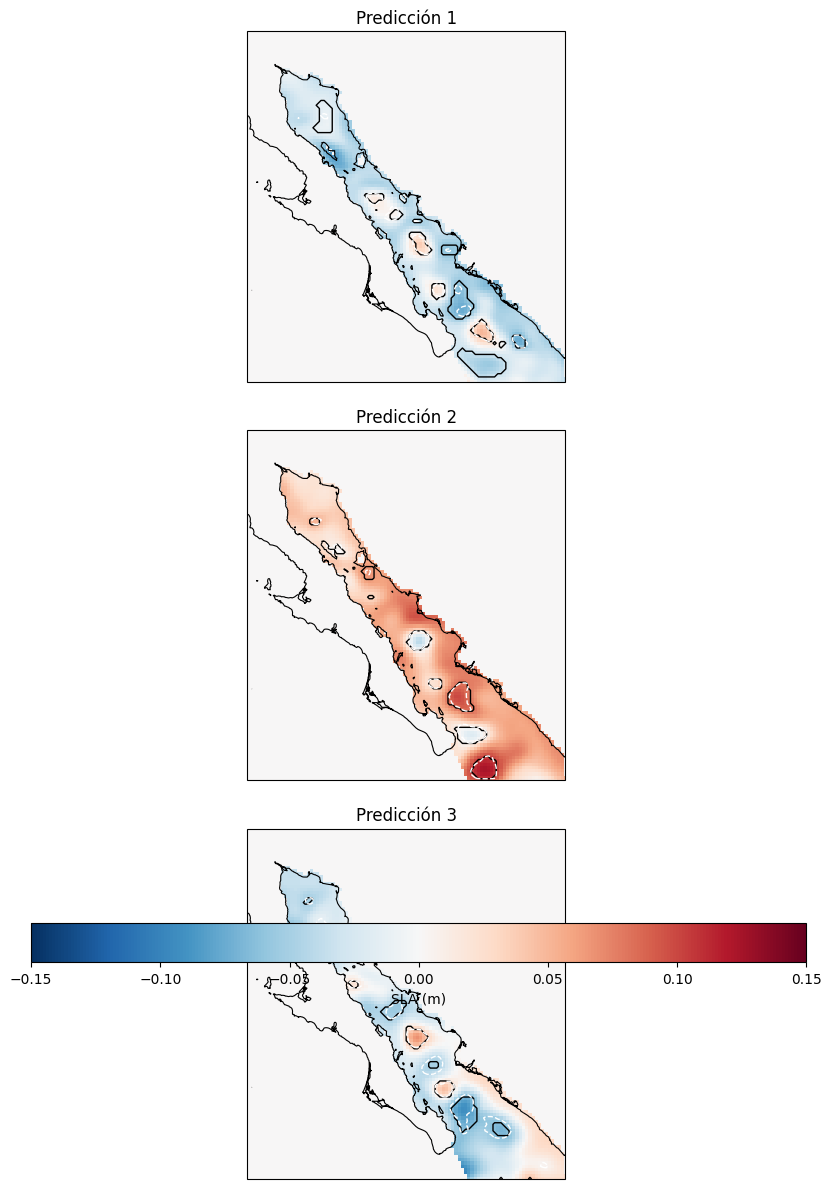

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def visualize_sla_predictions(lon, lat, sla, Y_test, predictions, num_samples=3):
    num_samples = min(num_samples, len(Y_test))  # Asegurar que no seleccionamos más de los disponibles
    indices = np.random.choice(len(Y_test), num_samples, replace=False)

    fig, axes = plt.subplots(num_samples, 1, figsize=(10, 4 * num_samples), subplot_kw={'projection': ccrs.PlateCarree()})

    for i, idx in enumerate(indices):
        ax = axes[i]
        ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())
        ax.add_feature(cfeature.LAND, color='black')
        ax.add_feature(cfeature.COASTLINE, linewidth=0.8)

        # Graficar SLA con colores azul-rojo centrado en 0
        pcm = ax.pcolormesh(lon, lat, sla[idx, :, :], cmap="RdBu_r", vmin=-0.15, vmax=0.15)

        # Contornos en negro para la máscara real
        ax.contour(lon, lat, Y_test[idx, :, :, 0], levels=[0.5], colors='black', linewidths=1)

        # Contornos en blanco para la predicción (línea discontinua)
        ax.contour(lon, lat, predictions[idx, :, :, 0], levels=[0.5], colors='white', linewidths=1, linestyles='dashed')

        ax.set_title(f"Predicción {i+1}")

    # Agregar barra de colores
    cbar = plt.colorbar(pcm, ax=axes, orientation='horizontal', pad=0.05)
    cbar.set_label("SLA (m)")

    plt.tight_layout()
    plt.show()

# Generar predicciones antes de visualizar
predictions = unet_model.predict(X_test)

# Llamar a la función asegurando que `sla` tiene la forma correcta
visualize_sla_predictions(lon_vec, lat_vec, X_test[:, :, :, 0], Y_test, predictions, num_samples=3)


In [83]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def visualize_sla_predictions(lon, lat, sla, Y_test, predictions, num_samples=3):
    """
    Visualiza la SLA con contornos de la máscara real (método físico) y las predicciones de la U-Net.
    
    Parámetros:
    - lon: Matriz 2D de longitudes
    - lat: Matriz 2D de latitudes
    - sla: Matriz de SLA con las mismas dimensiones que Y_test
    - Y_test: Máscaras reales de remolinos (método físico)
    - predictions: Predicciones generadas por la U-Net
    - num_samples: Número de muestras a visualizar
    """
    indices = np.random.choice(len(Y_test), num_samples, replace=False)

    fig, axes = plt.subplots(num_samples, 1, figsize=(10, 5 * num_samples),
                             subplot_kw={'projection': ccrs.PlateCarree()})

    if num_samples == 1:
        axes = [axes]

    for i, idx in enumerate(indices):
        ax = axes[i]
        ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())

        # Mapa de fondo con relieve
        ax.add_feature(cfeature.LAND, color='black')
        ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=1)

        # Visualización de SLA con colores centrados en 0
        pcm = ax.pcolormesh(lon, lat, sla[idx], cmap="RdBu_r", vmin=-0.15, vmax=0.15, transform=ccrs.PlateCarree())

        # Contornos en negro para la máscara real (Método físico)
        cont_real = ax.contour(lon, lat, Y_test[idx, :, :, 0], levels=[0.5], colors='green', linewidths=1, transform=ccrs.PlateCarree())

        # Contornos en blanco para la predicción de la U-Net
        cont_pred = ax.contour(lon, lat, predictions[idx, :, :, 0], levels=[0.5], colors='purple', linewidths=1, linestyles='dashed', transform=ccrs.PlateCarree())

        # Etiquetas y ejes
        ax.set_title(f"Predicción {i+1}")
        ax.set_xlabel("Longitud")
        ax.set_ylabel("Latitud")
        ax.gridlines(draw_labels=True)

        # Leyenda de los contornos
        from matplotlib.lines import Line2D
        legend_elements = [
            Line2D([0], [0], color='green', lw=1, label='Método Físico'),
            Line2D([0], [0], color='purple', lw=1, linestyle='dashed', label='U-Net')
        ]
        ax.legend(handles=legend_elements, loc='upper right')

    # Agregar barra de colores en la parte inferior
    cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])  # Ajustar posición
    cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
    cbar.set_label("SLA (m)")

    plt.tight_layout(rect=[0, 0.1, 1, 1])
    plt.show()


C:\Users\Segunda El Dago\AppData\Local\Temp\ipykernel_20104\203216894.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])


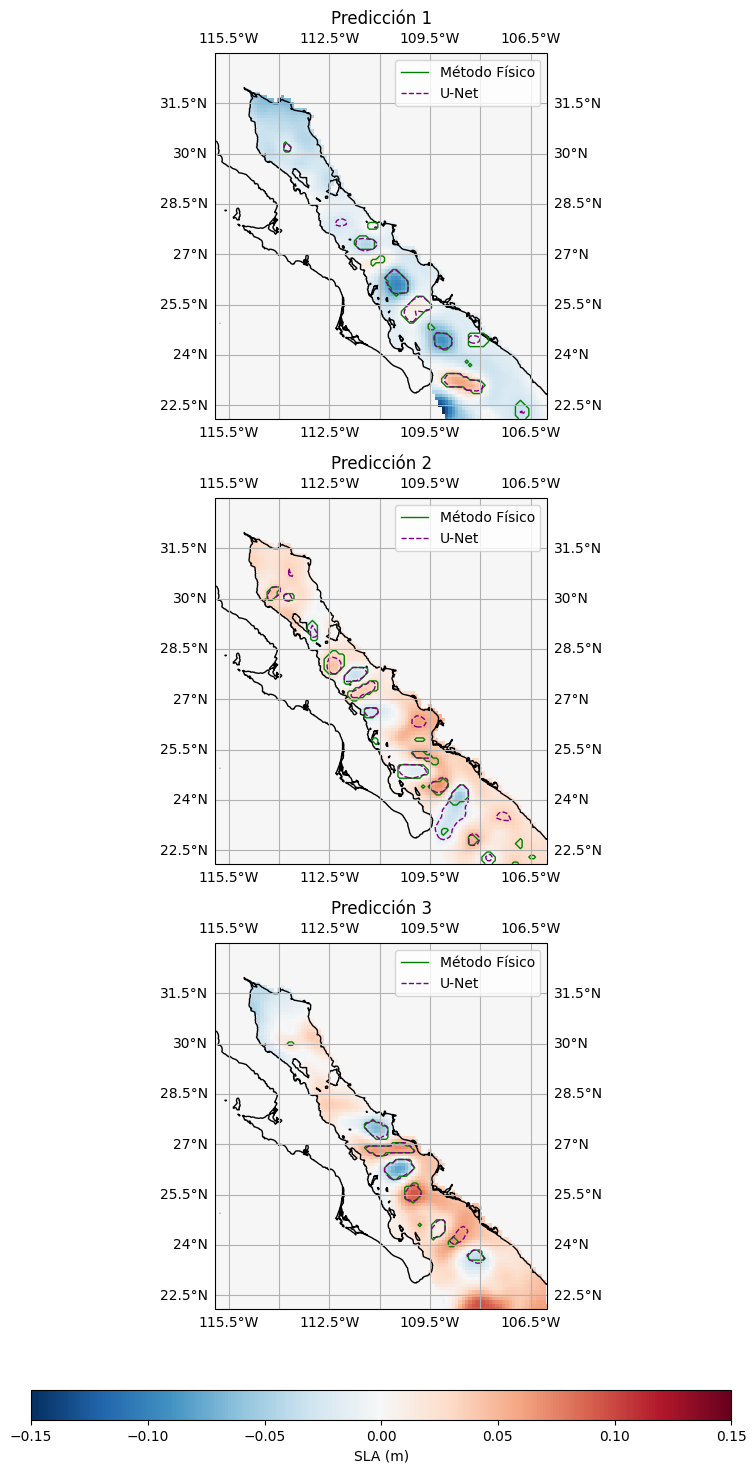

In [84]:
visualize_sla_predictions(lon_vec, lat_vec, X_test[:, :, :, 0], Y_test, predictions, num_samples=3)

In [86]:
unet_model.save("modelo_unet_remolinos.keras")
